In [17]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
import pickle


In [ ]:

h5_file_path = "galaxy.h5"

with h5py.File(h5_file_path, 'r') as file:
    keys = list(file.keys())
    print("Keys in the .h5 file:", keys)

    for key in keys:
        dataset = file[key]
        print(f"\nDataset: {key}")
        print(f"Shape: {dataset.shape}")
        print(f"Data type: {dataset.dtype}")
        print(f"First few values: {dataset[:5]}")  

Keys in the .h5 file: ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']

Dataset: ans
Shape: (17736,)
Data type: uint8
First few values: [0 0 0 0 0]

Dataset: dec
Shape: (17736,)
Data type: float64
First few values: [-0.48415469 -1.18903068 -1.12741812  0.65817621  0.92654337]

Dataset: images
Shape: (17736, 256, 256, 3)
Data type: uint8
First few values: [[[[ 68  19  23]
   [ 58  17  33]
   [ 40  16  40]
   ...
   [ 51  46  43]
   [ 40  41  33]
   [ 28  38  30]]

  [[ 61  40  37]
   [ 52  43  44]
   [ 29  39  41]
   ...
   [ 28  30  42]
   [ 28  32  35]
   [ 33  40  33]]

  [[ 30  31  25]
   [ 24  41  33]
   [ 15  45  33]
   ...
   [ 21  35  48]
   [ 25  35  45]
   [ 37  41  40]]

  ...

  [[ 28  32  35]
   [ 27  31  32]
   [ 42  44  43]
   ...
   [ 20  37  27]
   [ 19  40  21]
   [ 27  50  24]]

  [[ 22  36  37]
   [ 19  29  30]
   [ 33  37  38]
   ...
   [ 17  35  35]
   [ 17  35  21]
   [ 26  45  17]]

  [[ 18  39  40]
   [ 14  28  29]
   [ 24  30  30]
   ...
   [ 20  35  56]
 

In [3]:
with h5py.File(h5_file_path, 'r') as file:
    
    images = file['images'][:]
    print("Images shape:", images.shape)
    ans = file['ans'][:]
    print("Ans values:", ans[:5])



Images shape: (17736, 256, 256, 3)
Ans values: [0 0 0 0 0]


In [4]:


resized_images = np.array([smart_resize(img, (128, 128)) for img in images])
images_normalized = resized_images.astype("float32") / 255.0
num_classes = len(np.unique(ans))
labels_encoded = to_categorical(ans, num_classes=num_classes) 


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    images_normalized, labels_encoded, test_size=0.2, random_state=42
)

In [6]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

C:\Users\VIKRAMJEET\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,602 (24.87 MB)

 Trainable params: 6,518,602 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=(X_test, y_test)
)

C:\Users\VIKRAMJEET\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 67s 147ms/step - accuracy: 0.2112 - loss: 2.1045 - val_accuracy: 0.3647 - val_loss: 1.7206
Epoch 2/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 85s 192ms/step - accuracy: 0.3511 - loss: 1.7714 - val_accuracy: 0.4332 - val_loss: 1.4959
Epoch 3/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 221s 498ms/step - accuracy: 0.4151 - loss: 1.5755 - val_accuracy: 0.3873 - val_loss: 1.6027
Epoch 4/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 102s 229ms/step - accuracy: 0.4656 - loss: 1.4431 - val_accuracy: 0.5513 - val_loss: 1.2437
Epoch 5/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 92s 207ms/step - accuracy: 0.5128 - loss: 1.3518 - val_accuracy: 0.5724 - val_loss: 1.1950
Epoch 6/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.5534 - loss: 1.2547 - val_accuracy: 0.5916 - val_loss: 1.1218
Epoch 7/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 64s 144ms/step - accuracy: 0.5733 - loss: 1.2120 - val_accuracy: 0.6271 - val_loss: 1.0600
Epoch 8/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.5882 - loss:

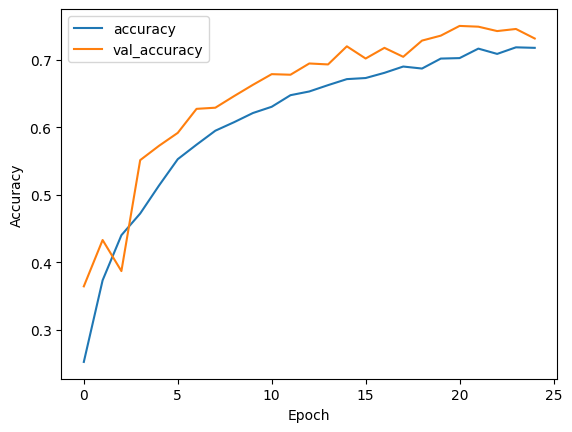

In [8]:

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
correct_predictions = 0
total_samples = len(X_test)


for i in range(total_samples):
    
    sample_image = X_test[i]
    true_class = np.argmax(y_test[i])
    
    prediction = model.predict(np.expand_dims(sample_image, axis=0), verbose=0)
    predicted_class = np.argmax(prediction)
    
    if predicted_class == true_class:
        correct_predictions += 1
    
    print(f"Sample {i + 1}:")
    print(f"  Predicted class: {predicted_class}")
    print(f"  True class: {true_class}")
    print("-" * 30)

Sample 1:
  Predicted class: 7
  True class: 7
------------------------------
Sample 2:
  Predicted class: 4
  True class: 4
------------------------------
Sample 3:
  Predicted class: 7
  True class: 7
------------------------------
Sample 4:
  Predicted class: 2
  True class: 2
------------------------------
Sample 5:
  Predicted class: 8
  True class: 8
------------------------------
Sample 6:
  Predicted class: 3
  True class: 3
------------------------------
Sample 7:
  Predicted class: 3
  True class: 3
------------------------------
Sample 8:
  Predicted class: 8
  True class: 8
------------------------------
Sample 9:
  Predicted class: 8
  True class: 8
------------------------------
Sample 10:
  Predicted class: 8
  True class: 8
------------------------------
Sample 11:
  Predicted class: 2
  True class: 6
------------------------------
Sample 12:
  Predicted class: 9
  True class: 9
------------------------------
Sample 13:
  Predicted class: 5
  True class: 5
-------------

In [13]:
accuracy = correct_predictions / total_samples
print(f"\nAccuracy on the test dataset: {accuracy * 100:.2f}%")


Accuracy on the test dataset: 73.11%


In [14]:
model.save("model.keras")

In [15]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(num_classes, f)